In [1]:
### DEFINE VARIABLES
### DEFINE VARIABLES
### DEFINE VARIABLES
import os
import re
import shutil
import glob
import time

# Start time
start_time = time.time()

# Define directories
## Which GFF file to use for annotations?
#input_gff_file = "SymbC1.Gene_Models_with_annotations.GFF3"
input_gff_file = "SymbC1.Gene_Models_with_annotations_abbrev_CURATED.GFF3"


## Which VCF file to use for SNP visualisation?
my_vcf_file = "GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf"

#SNP_metadata = "SNP_metadata.csv"
SNP_metadata = "SNP_metadata_all_comparisons.csv"

# WHICH FILE TO USE TO BATCH PROCESS ALL SCAFFOLDS?
scaffolds_input_file = "scaffolds_list_selected_WT_vs_SS.txt"
#scaffolds_input_file = "scaffolds_list_selected_SS8_SS35.txt"
#scaffolds_input_file = "scaffold_list_SS8_VS_SS35.txt"
#scaffolds_input_file = "scaffold_list_WT_vs_SS.txt"

### CREATE OUTPUT DIRECTORY
output_dir = "./OUTPUT"
# Ensure the OUTPUT directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    
    
# Read the list of scaffolds from the file, excluding those with a prefix #
with open(scaffolds_input_file, 'r') as file:
    scaffolds = [line.strip() for line in file.readlines() if not line.startswith('#') and line.strip()]

    # Create a directory named after the scaffold
    for scaffold in scaffolds:
      # Create output directory for the scaffold within the OUTPUT directory
            scaffold_folder = os.path.join(output_dir, scaffold)
            if not os.path.exists(scaffold_folder):
                os.makedirs(scaffold_folder)
            print(f"Processing {scaffold}")
            print(f"Folder created: {scaffold_folder}")


Processing SymbC1.scaffold288
Folder created: ./OUTPUT/SymbC1.scaffold288
Processing SymbC1.scaffold3829
Folder created: ./OUTPUT/SymbC1.scaffold3829
Processing SymbC1.scaffold2613
Folder created: ./OUTPUT/SymbC1.scaffold2613
Processing SymbC1.scaffold9578
Folder created: ./OUTPUT/SymbC1.scaffold9578
Processing SymbC1.scaffold1520
Folder created: ./OUTPUT/SymbC1.scaffold1520
Processing SymbC1.scaffold75
Folder created: ./OUTPUT/SymbC1.scaffold75
Processing SymbC1.scaffold1708
Folder created: ./OUTPUT/SymbC1.scaffold1708
Processing SymbC1.scaffold252
Folder created: ./OUTPUT/SymbC1.scaffold252
Processing SymbC1.scaffold7607
Folder created: ./OUTPUT/SymbC1.scaffold7607
Processing SymbC1.scaffold5652
Folder created: ./OUTPUT/SymbC1.scaffold5652
Processing SymbC1.scaffold1548
Folder created: ./OUTPUT/SymbC1.scaffold1548
Processing SymbC1.scaffold12930
Folder created: ./OUTPUT/SymbC1.scaffold12930


In [2]:
### SUBSET GFF FILE TO SHOW SCAFFOLD OF INTEREST
### SUBSET GFF FILE TO SHOW SCAFFOLD OF INTEREST
### SUBSET GFF FILE TO SHOW SCAFFOLD OF INTEREST
import os
import re

# Ensure the OUTPUT directory exists
output_dir = "./OUTPUT"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
        
for scaffold in scaffolds:
    # Create output directory for the scaffold within the OUTPUT directory
    scaffold_folder = os.path.join(output_dir, scaffold)
    if not os.path.exists(scaffold_folder):
        os.makedirs(scaffold_folder)
    print(f"Processing {scaffold}")
    print(f"Folder created: {scaffold_folder}")
    
    # Define the input and output file names
    gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_subset.GFF3")
    
    # Process the GFF file line by line
    with open(input_gff_file, "r") as f_in, open(gff_subset_no_SNPs, "w") as f_out:
        for line in f_in:
            if re.search(fr"\b{scaffold}\b", line):
                f_out.write(line)



Processing SymbC1.scaffold288
Folder created: ./OUTPUT/SymbC1.scaffold288
Processing SymbC1.scaffold3829
Folder created: ./OUTPUT/SymbC1.scaffold3829
Processing SymbC1.scaffold2613
Folder created: ./OUTPUT/SymbC1.scaffold2613
Processing SymbC1.scaffold9578
Folder created: ./OUTPUT/SymbC1.scaffold9578
Processing SymbC1.scaffold1520
Folder created: ./OUTPUT/SymbC1.scaffold1520
Processing SymbC1.scaffold75
Folder created: ./OUTPUT/SymbC1.scaffold75
Processing SymbC1.scaffold1708
Folder created: ./OUTPUT/SymbC1.scaffold1708
Processing SymbC1.scaffold252
Folder created: ./OUTPUT/SymbC1.scaffold252
Processing SymbC1.scaffold7607
Folder created: ./OUTPUT/SymbC1.scaffold7607
Processing SymbC1.scaffold5652
Folder created: ./OUTPUT/SymbC1.scaffold5652
Processing SymbC1.scaffold1548
Folder created: ./OUTPUT/SymbC1.scaffold1548
Processing SymbC1.scaffold12930
Folder created: ./OUTPUT/SymbC1.scaffold12930


In [3]:
### SUBSET VCF FILE TO SHOW SCAFFOLD OF INTEREST 
### SUBSET VCF FILE TO SHOW SCAFFOLD OF INTEREST 
### SUBSET VCF FILE TO SHOW SCAFFOLD OF INTEREST
import os
import re

# Ensure the OUTPUT directory exists
output_dir = "./OUTPUT"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for scaffold in scaffolds:
    # Create output directory for the scaffold within the OUTPUT directory
    scaffold_folder = os.path.join(output_dir, scaffold)
    if not os.path.exists(scaffold_folder):
        os.makedirs(scaffold_folder)
    print(f"Processing {scaffold}")
    print(f"Folder created: {scaffold_folder}")
    
    # Define the output VCF file name
    vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")

    # Open the input VCF file for reading and the output VCF file for writing
    with open(my_vcf_file, 'r') as vcf_file, open(vcf_file_subset, 'w') as out_file:
        for line in vcf_file:
            if line.startswith('#') or re.search(fr"\b{scaffold}\b", line):
                out_file.write(line)

    print(f"Filtered VCF file created: {vcf_file_subset}")

    
### REFORMAT VCF SUBSET TO GFF FORMAT
### REFORMAT VCF SUBSET TO GFF FORMAT
### REFORMAT VCF SUBSET TO GFF FORMAT

# Continue within the same loop to process the VCF subset
    gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")

    # Open the VCF subset file for reading and the GFF file for writing
    with open(vcf_file_subset, 'r') as vcf_file, open(gff_subset_SNPs_only, 'w') as converted_file:
        for line in vcf_file:
            if line.startswith('#'):
                continue
            
            # Split the line into fields
            fields = line.strip().split('\t')
            
            # Extract scaffold information from the first field
            scaffold = fields[0]
            
            # Extract other relevant information
            position = fields[1]
            reference_allele = fields[3]
            alternate_allele = fields[4]
            
            # Format the extracted information into the desired format
            converted_line = f"{scaffold}\tEVM\tSNP\t{position}\t{position}\t.\t+\t.\tgene_id={scaffold};Name={scaffold}\n"
            
            # Write the converted line to the new file
            converted_file.write(converted_line)
            
    print(f"Converted GFF file created: {gff_subset_SNPs_only}")

            

Processing SymbC1.scaffold288
Folder created: ./OUTPUT/SymbC1.scaffold288
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold288/SymbC1.scaffold288_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf
Converted GFF file created: ./OUTPUT/SymbC1.scaffold288/SymbC1.scaffold288_SNPs_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf.GFF
Processing SymbC1.scaffold3829
Folder created: ./OUTPUT/SymbC1.scaffold3829
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf
Converted GFF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_SNPs_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf.GFF
Processing SymbC1.scaffold2613
Folder created: ./OUTPUT/SymbC1.scaffold2613
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold2613/SymbC1.scaffold2613_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.r

In [4]:
### SUBSET METADATA
### SUBSET METADATA
### SUBSET METADATA

import os
import subprocess
   

for scaffold in scaffolds:
    # Update scaffold_folder for each scaffold
    scaffold_folder = os.path.join(output_dir, scaffold)

    #Define the output VCF file name
    meta_data_subset = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.csv")
    # Redefine variables for the loop
    gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")
    vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")
    gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_subset.GFF3")

    # Open the input VCF file for reading
    with open(SNP_metadata, 'r') as vcf_file:
        # Open the new output VCF file for writing
        with open(meta_data_subset, 'w') as out_file:
            # Iterate through each line in the VCF file
            for line in vcf_file:
                # Check if the line contains the scaffold identifier
                if re.search(fr".*{scaffold}\s.*", line):
                    # Write the line to the output file
                    out_file.write(line)
    
    print(f"Filtered VCF file created: {meta_data_subset}")
    
    
    
    ### ADD META DATA TO GFF FILE THAT HAS ONLY THE RELEVANT SNP INFORMATION
    ### ADD META DATA TO GFF FILE THAT HAS ONLY THE RELEVANT SNP INFORMATION
    ### ADD META DATA TO GFF FILE THAT HAS ONLY THE RELEVANT SNP INFORMATION
    
    gff_subset_SNPs_only_including_metadata = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.GFF")
    
    # Read metadata from CSV
    metadata_lines = []
    with open(meta_data_subset, 'r') as meta_file:
        for line in meta_file:
            metadata_lines.append(line.strip())
    
    # Read GFF file and add metadata
    with open(gff_subset_SNPs_only, 'r') as gff_file:
        with open(gff_subset_SNPs_only_including_metadata, 'w') as output_file:
            for gff_line, metadata_line in zip(gff_file, metadata_lines):
                gff_fields = gff_line.strip().split('\t')
                metadata_fields = metadata_line.strip().split('\t')
                Scaffold_Length, impact, category, annotation, GLM_padjust_WT_vs_SS, star_WT_vs_SS, GLM_padjust_SS8_vs_SS35, star_SS8_vs_SS35 = metadata_fields[4], metadata_fields[8], metadata_fields[9], metadata_fields[12], metadata_fields[20], metadata_fields[21], metadata_fields[40], metadata_fields[41] 
                gff_fields[8] += f";Scaffold_Length={Scaffold_Length};impact={impact};category={category};annotation={annotation};padjust_WT_vs_SS={GLM_padjust_WT_vs_SS};star_WT_vs_SS={star_WT_vs_SS};padjust_SS8_vs_SS35={GLM_padjust_SS8_vs_SS35};star_SS8_vs_SS35={star_SS8_vs_SS35}"
                output_file.write('\t'.join(gff_fields) + '\n')

    print(f"Merged GFF file created: {gff_subset_SNPs_only_including_metadata}")

Filtered VCF file created: ./OUTPUT/SymbC1.scaffold288/SymbC1.scaffold288_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold288/SymbC1.scaffold288_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold2613/SymbC1.scaffold2613_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold2613/SymbC1.scaffold2613_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold9578/SymbC1.scaffold9578_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold9578/SymbC1.scaffold9578_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold1520/SymbC1.scaffold1520_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold1520/SymbC1.scaffold1520_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold75/SymbC1.scaffold75_SNP_metadata

In [5]:
# COMBINE GFF SUBSET WITH GFF THAT SHOWS RELEVANT SNPs
# COMBINE GFF SUBSET WITH GFF THAT SHOWS RELEVANT SNPs
# COMBINE GFF SUBSET WITH GFF THAT SHOWS RELEVANT SNPs
for scaffold in scaffolds:
    # Update scaffold_folder for each scaffold
    scaffold_folder = os.path.join(output_dir, scaffold)

    gff_subset_concatenated_with_SNPs = os.path.join(scaffold_folder, f"{scaffold}_concatenated_output.gff")  
    #Define the output VCF file name
    # Redefine variables for the loop
    meta_data_subset = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.csv")
    gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")
    vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")
    gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_subset.GFF3")
    gff_subset_SNPs_only_including_metadata = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.GFF")
    
    # Concatenate the VCF subset and GFF files into the final output file
    with open((gff_subset_concatenated_with_SNPs), 'w') as final_out_file:
        # First, write the contents of the VCF subset file
        with open((gff_subset_no_SNPs), 'r') as vcf_subset_file:
            for line in vcf_subset_file:
                final_out_file.write(line)
        
        # Then, write the contents of the GFF file
        with open((gff_subset_SNPs_only_including_metadata), 'r') as gff_file:
            for line in gff_file:
                final_out_file.write(line)
    
    
    print(f"Final concatenated file created: {gff_subset_concatenated_with_SNPs}")        

Final concatenated file created: ./OUTPUT/SymbC1.scaffold288/SymbC1.scaffold288_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold2613/SymbC1.scaffold2613_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold9578/SymbC1.scaffold9578_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold1520/SymbC1.scaffold1520_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold75/SymbC1.scaffold75_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold1708/SymbC1.scaffold1708_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold252/SymbC1.scaffold252_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold7607/SymbC1.scaffold7607_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaff

Cluster: Start=0, End=14505, SNPs=[ExactPosition(4275), ExactPosition(4309)]
Cluster: Start=16054, End=30559, SNPs=[ExactPosition(23293), ExactPosition(23319)]
Cluster: Start=100718, End=115223, SNPs=[ExactPosition(107970)]
Cluster: Start=191793, End=206298, SNPs=[ExactPosition(199045)]


/tmp/ipykernel_583517/2030787623.py:196: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rectangle(


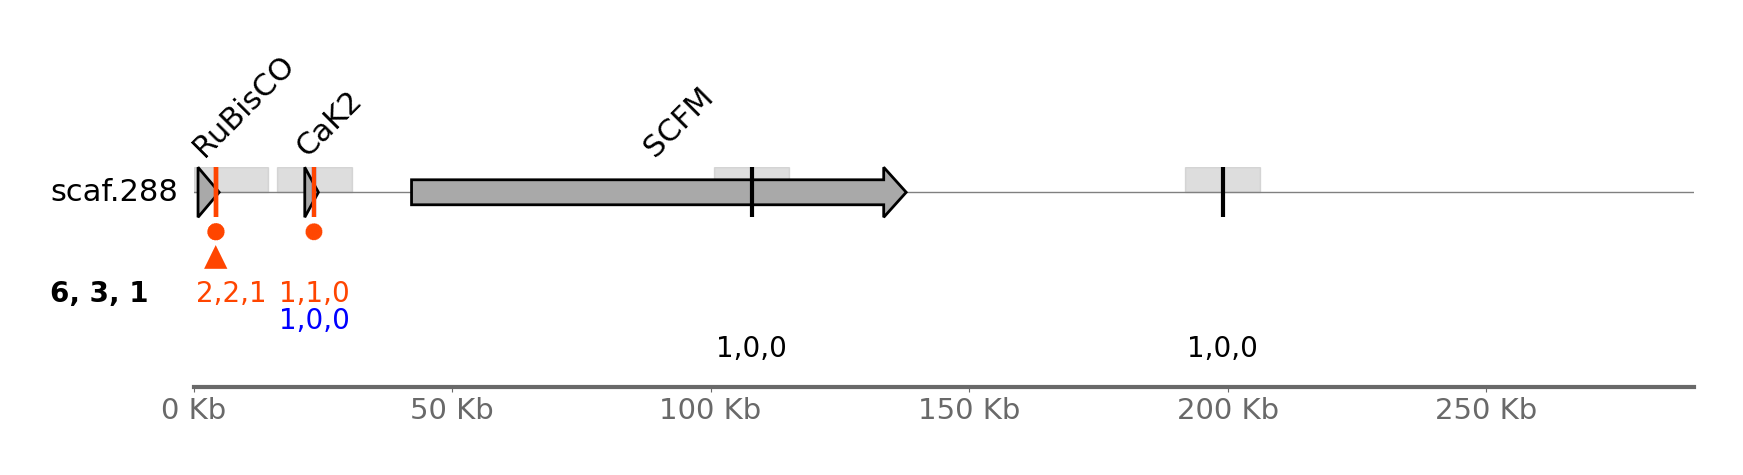

Cluster: Start=4129, End=7850, SNPs=[ExactPosition(5929), ExactPosition(5932), ExactPosition(5935), ExactPosition(6049)]
Cluster: Start=8480, End=12201, SNPs=[ExactPosition(10282), ExactPosition(10399)]
Cluster: Start=23183, End=26904, SNPs=[ExactPosition(24924), ExactPosition(24927), ExactPosition(24998), ExactPosition(25010), ExactPosition(25055), ExactPosition(25138), ExactPosition(25151), ExactPosition(25163)]
Cluster: Start=27703, End=31424, SNPs=[ExactPosition(29443), ExactPosition(29510), ExactPosition(29571), ExactPosition(29683)]
Cluster: Start=33308, End=37029, SNPs=[ExactPosition(34962), ExactPosition(34989), ExactPosition(34992), ExactPosition(35031), ExactPosition(35032), ExactPosition(35044), ExactPosition(35064), ExactPosition(35068), ExactPosition(35265), ExactPosition(35292), ExactPosition(35301), ExactPosition(35367), ExactPosition(35374)]


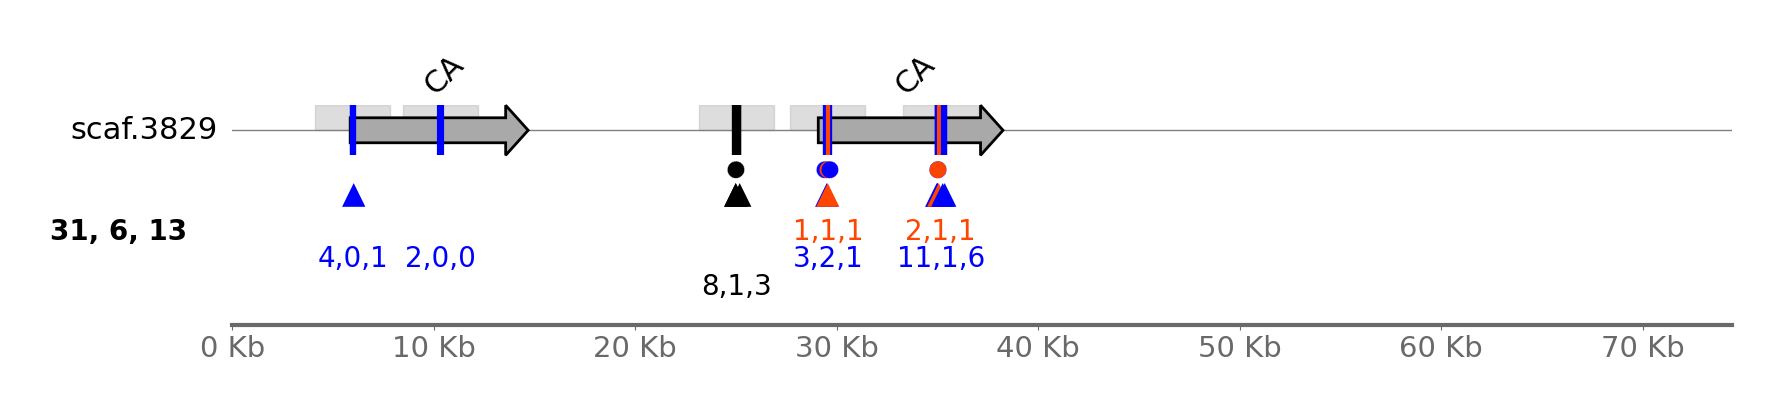

Cluster: Start=23489, End=33438, SNPs=[ExactPosition(28463)]
Cluster: Start=60944, End=70893, SNPs=[ExactPosition(61799), ExactPosition(70038)]
Cluster: Start=142180, End=152129, SNPs=[ExactPosition(143104), ExactPosition(143110), ExactPosition(143134), ExactPosition(143278), ExactPosition(143305), ExactPosition(144343), ExactPosition(144403), ExactPosition(144466), ExactPosition(145899), ExactPosition(147207), ExactPosition(147236), ExactPosition(147263), ExactPosition(150721), ExactPosition(150939), ExactPosition(151059), ExactPosition(151070), ExactPosition(151076), ExactPosition(151077), ExactPosition(151205)]


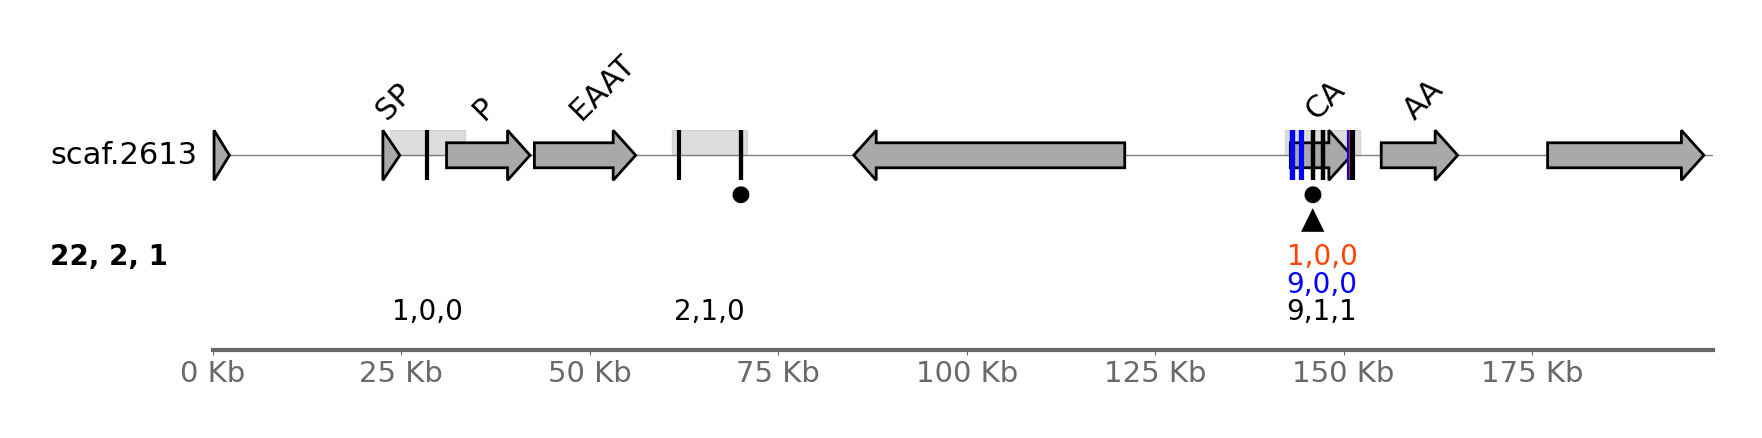

Cluster: Start=0, End=1285, SNPs=[ExactPosition(369), ExactPosition(390), ExactPosition(398), ExactPosition(407), ExactPosition(408)]
Cluster: Start=18315, End=19600, SNPs=[ExactPosition(18621), ExactPosition(18624), ExactPosition(18693), ExactPosition(18813), ExactPosition(19294)]


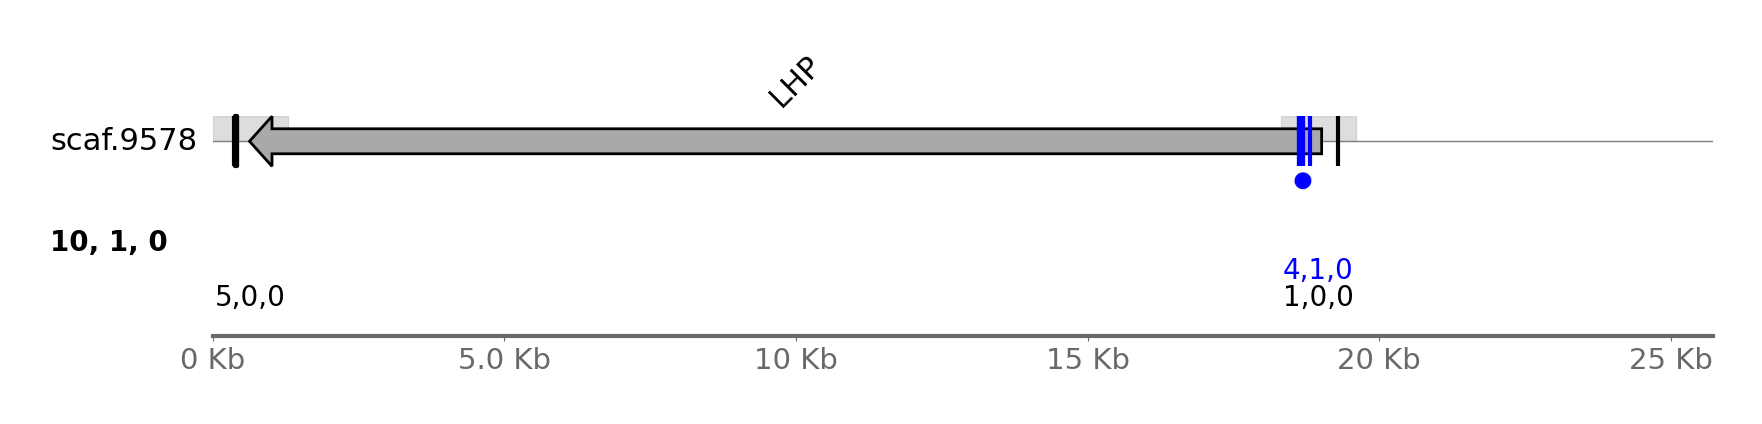

Cluster: Start=34487, End=40991, SNPs=[ExactPosition(35264), ExactPosition(37502), ExactPosition(39223), ExactPosition(40213)]
Cluster: Start=53655, End=60159, SNPs=[ExactPosition(54946), ExactPosition(56498), ExactPosition(58867)]
Cluster: Start=89897, End=96401, SNPs=[ExactPosition(92772), ExactPosition(93526)]


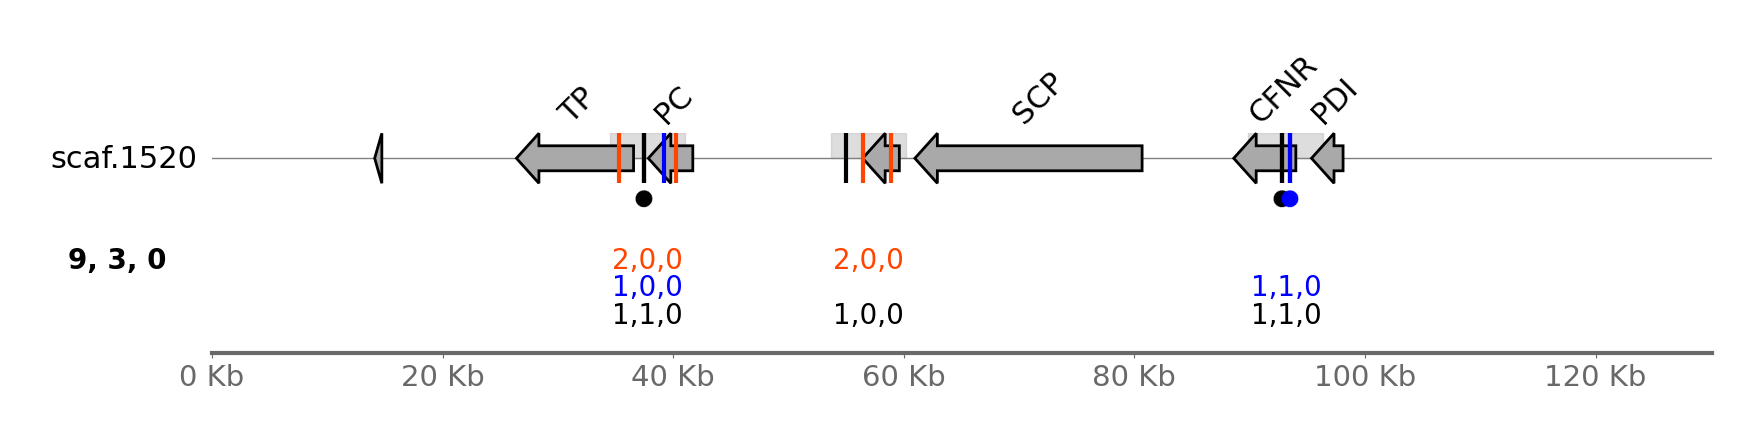

Cluster: Start=48967, End=67144, SNPs=[ExactPosition(58055)]
Cluster: Start=278501, End=296678, SNPs=[ExactPosition(287258), ExactPosition(287921)]


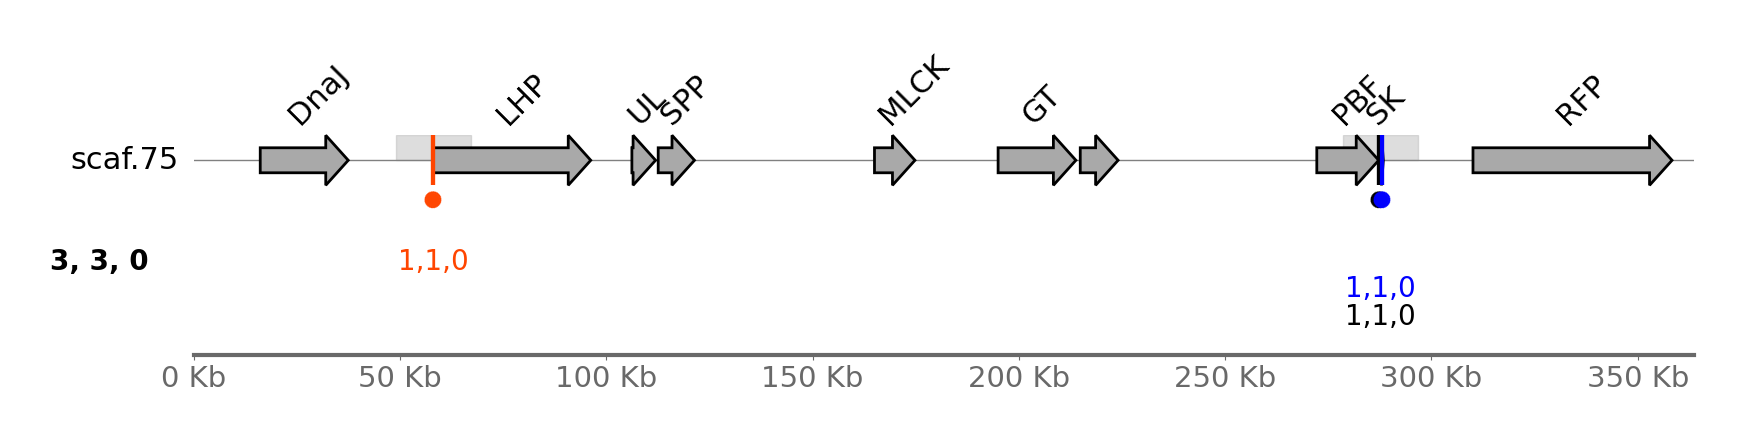

Cluster: Start=40435, End=46574, SNPs=[ExactPosition(43504)]


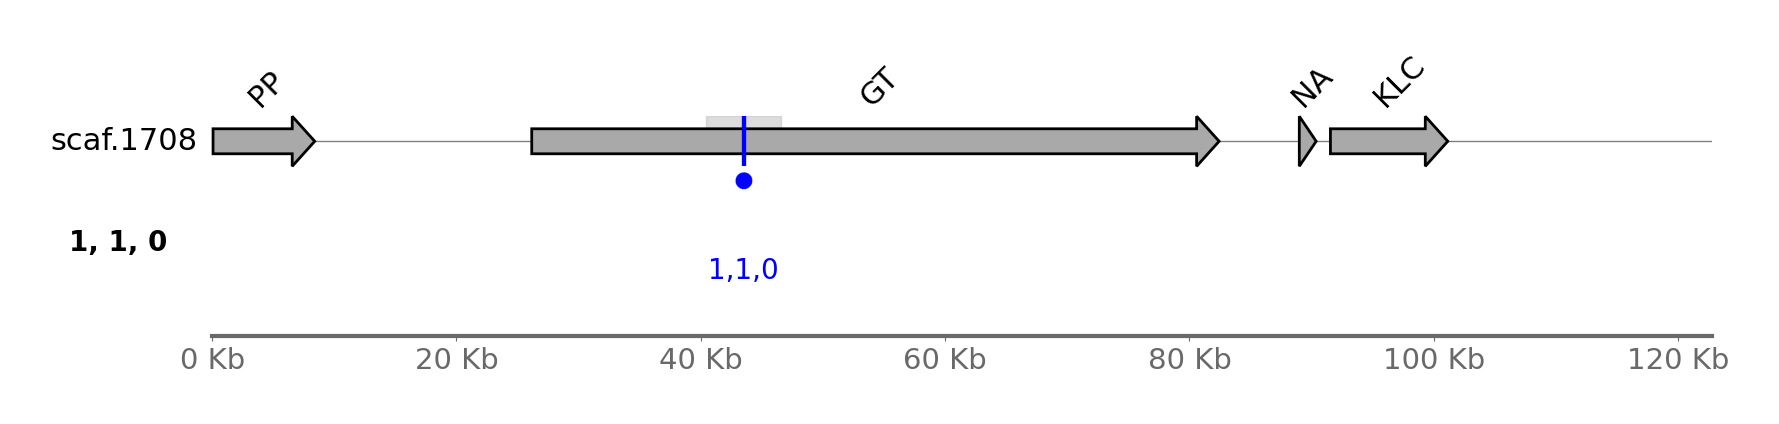

Cluster: Start=33365, End=46057, SNPs=[ExactPosition(36990), ExactPosition(42431)]
Cluster: Start=53445, End=66137, SNPs=[ExactPosition(59716), ExactPosition(59866)]
Cluster: Start=66883, End=79575, SNPs=[ExactPosition(73229)]
Cluster: Start=172138, End=184830, SNPs=[ExactPosition(178484)]
Cluster: Start=195583, End=208275, SNPs=[ExactPosition(201718), ExactPosition(202140)]
Cluster: Start=217255, End=229947, SNPs=[ExactPosition(223561), ExactPosition(223616), ExactPosition(223641)]


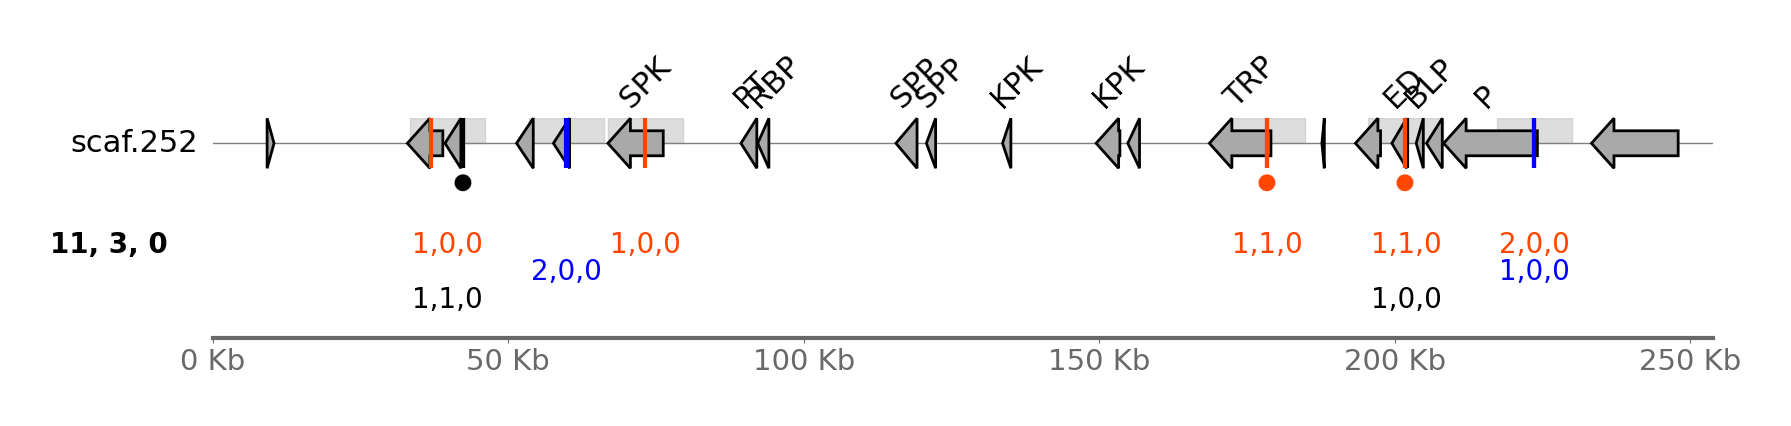

Cluster: Start=5871, End=7728, SNPs=[ExactPosition(6455), ExactPosition(7141), ExactPosition(7143)]
Cluster: Start=8854, End=10711, SNPs=[ExactPosition(9782)]
Cluster: Start=32849, End=34706, SNPs=[ExactPosition(33684), ExactPosition(33783), ExactPosition(33870)]


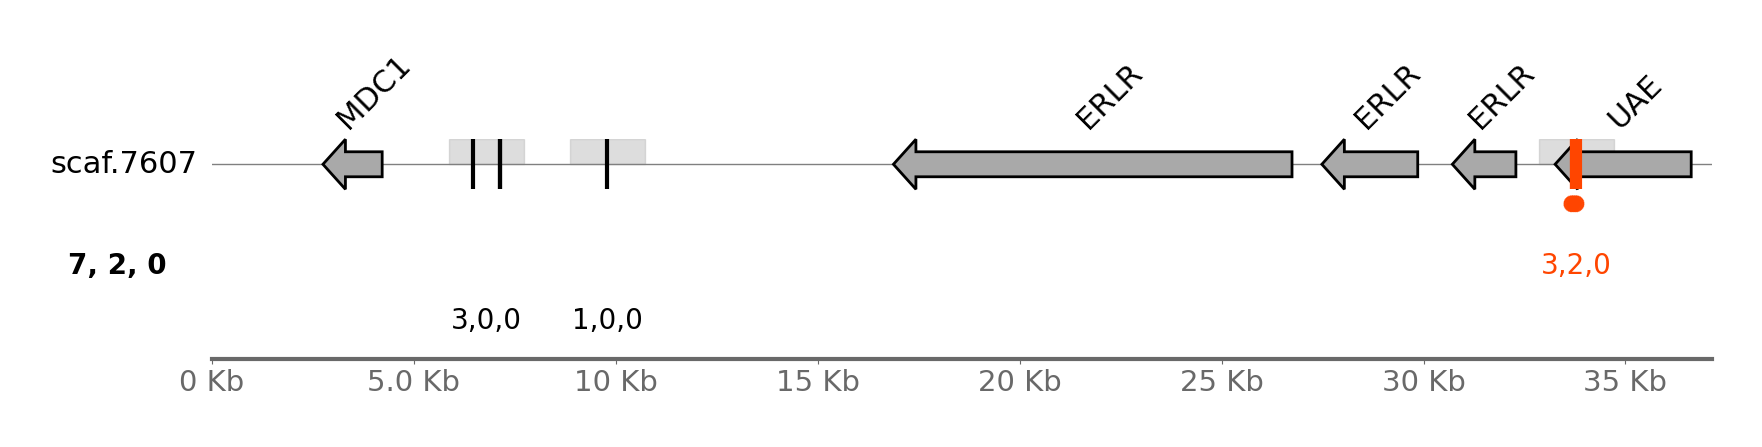

Cluster: Start=10802, End=13437, SNPs=[ExactPosition(12119)]
Cluster: Start=16559, End=19194, SNPs=[ExactPosition(17683), ExactPosition(17815), ExactPosition(17921), ExactPosition(17926), ExactPosition(17975), ExactPosition(18070)]
Cluster: Start=47120, End=49755, SNPs=[ExactPosition(48437)]


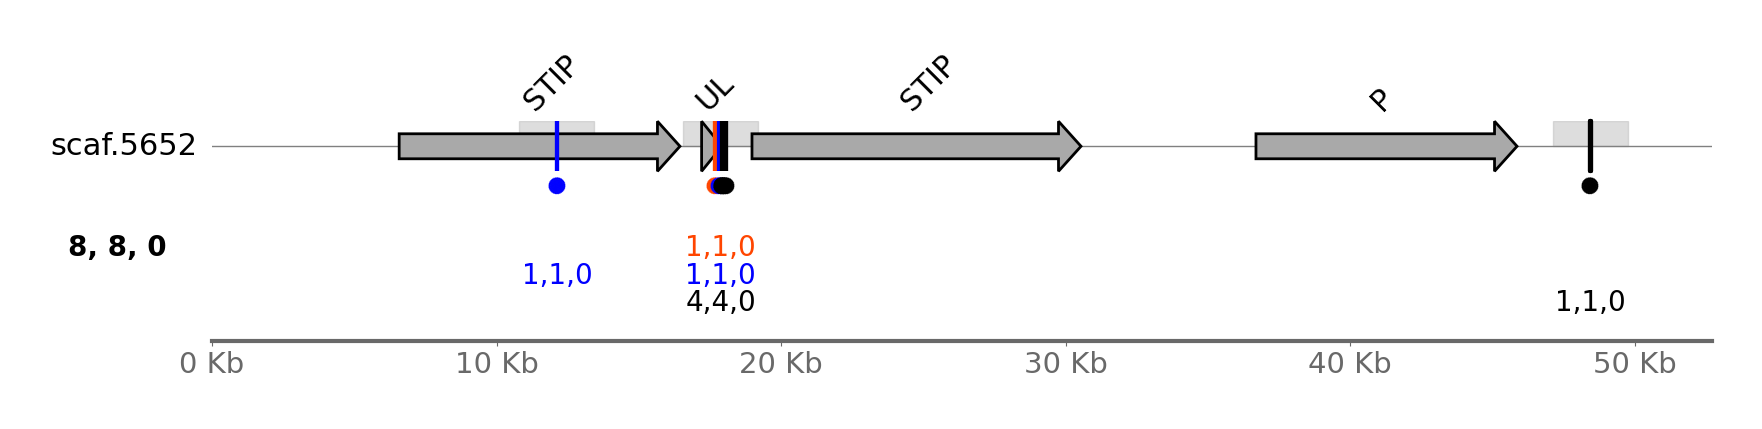

Cluster: Start=7871, End=14308, SNPs=[ExactPosition(11089)]
Cluster: Start=73200, End=79637, SNPs=[ExactPosition(76362), ExactPosition(76474)]
Cluster: Start=104828, End=111265, SNPs=[ExactPosition(108046)]


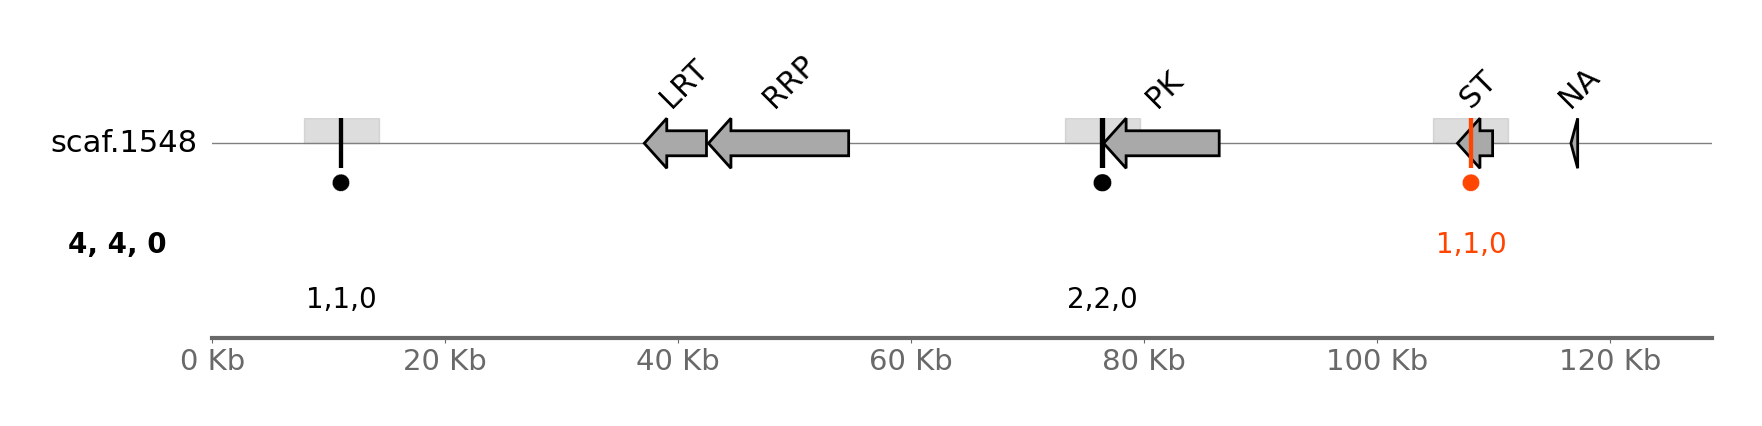

Cluster: Start=2919, End=3564, SNPs=[ExactPosition(3150), ExactPosition(3151), ExactPosition(3152), ExactPosition(3165), ExactPosition(3166), ExactPosition(3203), ExactPosition(3228), ExactPosition(3232), ExactPosition(3237), ExactPosition(3245), ExactPosition(3246), ExactPosition(3247), ExactPosition(3317), ExactPosition(3318), ExactPosition(3323), ExactPosition(3332)]


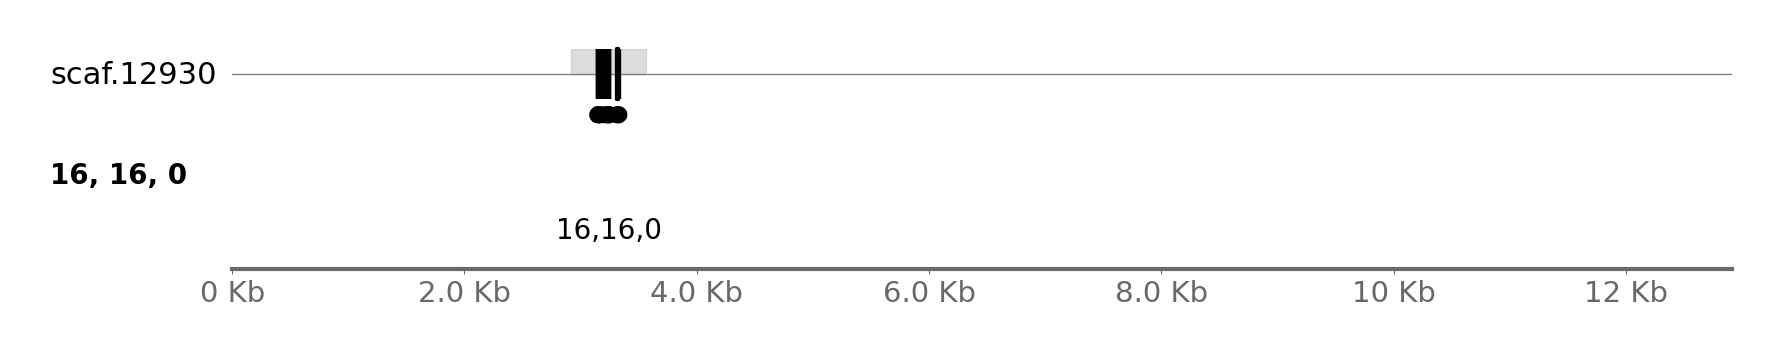

In [25]:
from PIL import Image
import os
from datetime import datetime
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from Bio.SeqFeature import SeqFeature, FeatureLocation
import numpy as np

# Function to generate a colour map for clusters
def generate_colours(num_colours):
    # Define a single light grey colour
    light_grey = '#bcbcbc'  # Light grey hex colour code
    # Create an array with the same colour repeated
    colours = [light_grey] * num_colours
    return colours

def create_clusters(snp_positions, cluster_size, scaffold_length):
    clusters = []
    snp_positions = sorted(snp_positions)
    used_positions = set()
    i = 0
    
    while i < len(snp_positions):
        cluster_snp_positions = []
        
        # Start a new cluster
        cluster_start = snp_positions[i]
        cluster_end = cluster_start + cluster_size
        
        # Add SNPs within the cluster size range to the cluster
        while i < len(snp_positions) and snp_positions[i] <= cluster_end:
            if snp_positions[i] not in used_positions:
                cluster_snp_positions.append(snp_positions[i])
                used_positions.add(snp_positions[i])
            i += 1
        
        if cluster_snp_positions:
            # Determine the lowest and highest SNP positions in this cluster
            min_snp_position = min(cluster_snp_positions)
            max_snp_position = max(cluster_snp_positions)
            
            # Recalculate the cluster's start and end based on the SNP range
            cluster_start = max(0, min_snp_position - (cluster_size - (max_snp_position - min_snp_position)) // 2)
            cluster_end = min(scaffold_length, cluster_start + cluster_size)
            
            # Ensure that the cluster does not overlap with previous clusters
            if clusters and cluster_start <= clusters[-1][1]:  # Adjusted to access the correct tuple element
                cluster_start = clusters[-1][1] + 1
                cluster_end = min(cluster_start + cluster_size, scaffold_length)
            
            # Append the cluster to the list with correct format
            clusters.append((cluster_start, cluster_end, cluster_snp_positions))
            
            # Debugging: Print cluster information
            print(f"Cluster: Start={cluster_start}, End={cluster_end}, SNPs={cluster_snp_positions}")
    
    return clusters

# Iterate over each scaffold
for scaffold in scaffolds:
    # Update variables
    scaffold_folder = os.path.join(output_dir, scaffold)
    gff_subset_concatenated_with_SNPs = os.path.join(scaffold_folder, f"{scaffold}_concatenated_output.gff")  
    
    # Load and process your GFF file
    gff = Gff(gff_subset_concatenated_with_SNPs)
    
    # Extract scaffold length from metadata
    scaffold_lengths = {}
    with open(gff_subset_concatenated_with_SNPs, 'r') as file:
        for line in file:
            if not line.startswith('#'):  # Ensure this is not a comment line
                fields = line.strip().split('\t')
                if len(fields) > 8:  # Ensure there is an attributes column
                    attributes = fields[8].split(';')
                    scaffold_length = None
                    for attribute in attributes:
                        if attribute.startswith('Scaffold_Length='):
                            scaffold_length = int(attribute.split('=')[1])
                            break
                    if scaffold_length:
                        seqid = fields[0]
                        scaffold_lengths[seqid] = scaffold_length

    # START BUILDING THE IMAGE.png
    gv = GenomeViz(fig_track_height=0.5, feature_track_ratio=1)
    
    # Plot SNPs with impact (different colours) and genes features for each contig
    for seqid, size in gff.get_seqid2size().items():
        formatted_seqid = 'scaf.' + seqid.split('scaffold')[-1]
        scaffold_length = scaffold_lengths.get(seqid, size)
        track = gv.add_feature_track(formatted_seqid, segments=(0, scaffold_length), labelsize=22)
    
        # Add sublabel with total SNP count
        SNP_features = gff.get_seqid2features(feature_type="SNP")[seqid]
        total_snp_count = len(SNP_features)

        # Get SNP positions for clustering
        snp_positions = [feature.location.start for feature in SNP_features]
        
        # Calculate cluster size as 5% of the scaffold length
        CLUSTER_SIZE = int(scaffold_length * 0.05)
        
        # Plot SNPs and features
        for feature in SNP_features:
            category = str(feature.qualifiers.get("category", [""])[0])
            if category == "HIGH":
                color = "deeppink"
            elif category == "MODERATE":
                color = "orangered"
            elif category == "LOW":
                color = "blue"
            else:
                color = "black"
            track.add_features([feature], color=color, plotstyle="bigbox", lw=3)

        # Count significant SNPs
        snp_count_below_0_01_WT_vs_SS = sum(
            1 for feature in SNP_features
            if float(feature.qualifiers.get("padjust_WT_vs_SS", [1])[0]) < 0.05
        )
        
        snp_count_below_0_01_SS8_vs_SS35 = sum(
            1 for feature in SNP_features
            if float(feature.qualifiers.get("padjust_SS8_vs_SS35", [1])[0]) < 0.05
        )

        # Add '*' for significant SNPs for WT vs SS
        for feature in SNP_features:
            padjust_WT_vs_SS = float(feature.qualifiers.get("padjust_WT_vs_SS", [1])[0])
            if padjust_WT_vs_SS < 0.05:
                category = str(feature.qualifiers.get("category", [""])[0])
                if category == "HIGH":
                    color = "deeppink"
                elif category == "MODERATE":
                    color = "orangered"
                elif category == "LOW":
                    color = "blue"
                else:
                    color = "black"
                track.add_features([feature], color=color, plotstyle="bigbox", label_type="star_WT_vs_SS", fc="skyblue", lw=3, text_kws=dict(size=16, rotation=41, vpos="bottom", hpos="right", color=color, ymargin=-0.05))
        
        # Add '*' for significant SNPs for SS8 vs SS35
        for feature in SNP_features:
            padjust_SS8_vs_SS35 = float(feature.qualifiers.get("padjust_SS8_vs_SS35", [1])[0])
            if padjust_SS8_vs_SS35 < 0.05:
                category = str(feature.qualifiers.get("category", [""])[0])
                if category == "HIGH":
                    color = "deeppink"
                elif category == "MODERATE":
                    color = "orangered"
                elif category == "LOW":
                    color = "blue"
                else:
                    color = "black"
                track.add_features([feature], color=color, plotstyle="bigbox", label_type="star_SS8_vs_SS35", fc="skyblue", lw=3, text_kws=dict(size=22, rotation=0, vpos="bottom", hpos="center", color=color, ymargin=1.0))

        # Add features for genes
        gene_features = gff.get_seqid2features(feature_type="gene")[seqid]
        for feature in gene_features:
            track.add_features([feature], plotstyle="bigarrow", arrow_shaft_ratio=0.5, fc="darkgrey", lw=2, hatch="", label_type="annotation", text_kws=dict(size=22, vpos="top", color="black"))

    # Add scale to plot at very bottom
    gv.set_scale_xticks(labelsize=21, ymargin=3.4)            
    
    # Generate the plot and retrieve the figure and axes
    fig = gv.plotfig()
    axes = fig.get_axes()

    # Set desired thickness for axis lines
    line_thickness = 3.0  # Adjust this value to make the lines thicker
    
    # Change the colour of the ticks and labels for each axis
    for ax in axes:
        ax.tick_params(axis='x', colors='dimgrey')  # Change 'dimgrey' to your desired colour
        ax.spines['bottom'].set_color('dimgrey')  # Bottom axis line
        ax.spines['bottom'].set_linewidth(line_thickness)
        ax.spines['top'].set_color('black')  # Top axis line (if present)
        ax.spines['top'].set_linewidth(line_thickness)

    # Get the track from the figure
    main_ax = axes[0]  # Assuming the first axes object contains the plot    
    for seqid, size in gff.get_seqid2size().items():
        SNP_features = gff.get_seqid2features(feature_type="SNP")[seqid]
        snp_positions = [feature.location.start for feature in SNP_features]
        scaffold_length = scaffold_lengths.get(seqid, size)
        clusters = create_clusters(snp_positions, CLUSTER_SIZE, scaffold_length)
        colours = generate_colours(len(clusters))
    
        # Add clusters to the plot
        for idx, (cluster_start, cluster_end, cluster_positions) in enumerate(clusters):
            colour = colours[idx]
            main_ax.add_patch(
                Rectangle(
                    (cluster_start, 0),  # Position (x, y)
                    cluster_end - cluster_start,  # Width
                    1,  # Height (set height as needed)
                    color=colour,  # Choose an appropriate colour
                    alpha=0.5,  # Use semi-transparent colour
                    lw=1,  # Add border width
                    edgecolor='black'  # Add border colour
                )
            )
    
            # Initialize counters for each impact category within the cluster
            high_count = 0
            moderate_count = 0
            low_count = 0
            other_count = 0
            high_count_WT_vs_SS = 0
            moderate_count_WT_vs_SS = 0
            low_count_WT_vs_SS = 0
            other_count_WT_vs_SS = 0
            high_count_SS8_vs_SS35 = 0
            moderate_count_SS8_vs_SS35 = 0
            low_count_SS8_vs_SS35 = 0
            other_count_SS8_vs_SS35 = 0
            
            # Count SNPs by impact category within the cluster
            for position in cluster_positions:
                for feature in SNP_features:
                    if feature.location.start == position:
                        category = str(feature.qualifiers.get("category", [""])[0])
                        padjust_WT_vs_SS = float(feature.qualifiers.get("padjust_WT_vs_SS", [1])[0])
                        padjust_SS8_vs_SS35 = float(feature.qualifiers.get("padjust_SS8_vs_SS35", [1])[0])
                        
                        # Count by category
                        if category == "HIGH":
                            high_count += 1
                            if padjust_WT_vs_SS < 0.05:
                                high_count_WT_vs_SS += 1
                            if padjust_SS8_vs_SS35 < 0.05:
                                high_count_SS8_vs_SS35 += 1
                        elif category == "MODERATE":
                            moderate_count += 1
                            if padjust_WT_vs_SS < 0.05:
                                moderate_count_WT_vs_SS += 1
                            if padjust_SS8_vs_SS35 < 0.05:
                                moderate_count_SS8_vs_SS35 += 1
                        elif category == "LOW":
                            low_count += 1
                            if padjust_WT_vs_SS < 0.05:
                                low_count_WT_vs_SS += 1
                            if padjust_SS8_vs_SS35 < 0.05:
                                low_count_SS8_vs_SS35 += 1
                        else:
                            other_count += 1
                            if padjust_WT_vs_SS < 0.05:
                                other_count_WT_vs_SS += 1
                            if padjust_SS8_vs_SS35 < 0.05:
                                other_count_SS8_vs_SS35 += 1
                
            # Add SNP count next to each other, now showing categorized counts
            # Prepare text labels
            high_moderate_sum = high_count + moderate_count
            high_moderate_WT_vs_SS = high_count_WT_vs_SS + moderate_count_WT_vs_SS
            high_moderate_SS8_vs_SS35 = high_count_SS8_vs_SS35 + moderate_count_SS8_vs_SS35
            
            low_count_str = f"{low_count},{low_count_WT_vs_SS},{low_count_SS8_vs_SS35}"
            high_moderate_str = f"{high_moderate_sum},{high_moderate_WT_vs_SS},{high_moderate_SS8_vs_SS35}"
            other_count_str = f"{other_count},{other_count_WT_vs_SS},{other_count_SS8_vs_SS35}"
            
            # Skip adding text if all counts are zero
            if not (high_moderate_sum == 0 and high_moderate_WT_vs_SS == 0 and high_moderate_SS8_vs_SS35 == 0):
                main_ax.text(
                    (cluster_start + cluster_end) / 2,  # Position at the center of the cluster
                    -3.5,  # Position below the SNP (adjust as needed)
                    high_moderate_str,
                    fontsize=20,  # Adjust fontsize as needed
                    color="orangered",
                    ha="center",
                    va="top"
                )
                
            if not (low_count == 0 and low_count_WT_vs_SS == 0 and low_count_SS8_vs_SS35 == 0):
                main_ax.text(
                    (cluster_start + cluster_end) / 2,  # Position at the center of the cluster
                    -4.6,  # Position below the SNP (adjust as needed)
                    low_count_str,
                    fontsize=20,  # Adjust fontsize as needed
                    color="blue",
                    ha="center",
                    va="top"
                )
                
            if not (other_count == 0 and other_count_WT_vs_SS == 0 and other_count_SS8_vs_SS35 == 0):
                main_ax.text(
                    (cluster_start + cluster_end) / 2,  # Position at the center of the cluster
                    -5.7,  # Position below the SNP (adjust as needed)
                    other_count_str,  # Text indicating the number of SNPs
                    fontsize=20,  # Adjust fontsize as needed
                    color="black",
                    ha="center",
                    va="top"
                )
    
    
    # Add labels to the desired position
    main_ax.text(
        -0.03, -1.25, 
        #f"# |SS|SS8\n{total_snp_count} | {snp_count_below_0_01_WT_vs_SS} |  {snp_count_below_0_01_SS8_vs_SS35}  ", 
        f"{total_snp_count}, {snp_count_below_0_01_WT_vs_SS}, {snp_count_below_0_01_SS8_vs_SS35}", 
        transform=main_ax.transAxes, 
        fontsize=20, 
        color='black', 
        ha='right', 
        va='top',
        fontweight='bold'  # Add this parameter to make text bold
    )

    # Manually adjust space between tracks by altering the position of axes
    space = -13.5
    for i in range(1, len(axes)):
        pos = axes[i].get_position()
        new_pos = [pos.x0, pos.y0 - (i * space), pos.width, pos.height]
        axes[i].set_position(new_pos)
    
    # Show the plot in the notebook (optional)
    plt.show()

    # Save the plot to a file
    output_file = os.path.join(scaffold_folder, f"SNPs_{scaffold}_full_sequence.png")
    fig.savefig(output_file, dpi=200)


In [19]:
import os
import shutil
import glob

# Define the output directory
output_dir = "./OUTPUT"

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each scaffold folder
for scaffold in scaffolds:
    scaffold_folder = os.path.join(output_dir, scaffold)
    
    # Find all .png files in the scaffold folder
    png_files = glob.glob(os.path.join(scaffold_folder, "*.png"))
    
    # Copy each .png file to the main OUTPUT directory
    for png_file in png_files:
        shutil.copy(png_file, output_dir)
        print(f"Copied {png_file} to {output_dir}")

print("All .png files have been copied to the main OUTPUT folder.")


#### PRINT RUN TIME
# End time
end_time = time.time()

# Calculate and print runtime
runtime = end_time - start_time
# Calculate and print runtime in minutes
runtime_minutes = runtime / 60
print(f"Total runtime of the script: {runtime_minutes:.2f} minutes")

## Clear Memory and reset run for the next
#reset -f

Copied ./OUTPUT/SymbC1.scaffold288/SNPs_SymbC1.scaffold288_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold3829/SNPs_SymbC1.scaffold3829_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold2613/SNPs_SymbC1.scaffold2613_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold9578/SNPs_SymbC1.scaffold9578_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold1520/SNPs_SymbC1.scaffold1520_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold75/SNPs_SymbC1.scaffold75_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold1708/SNPs_SymbC1.scaffold1708_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold252/SNPs_SymbC1.scaffold252_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold7607/SNPs_SymbC1.scaffold7607_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold5652/SNPs_SymbC1.scaffold5652_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold1548/SNPs_SymbC1.scaffold1548_full_sequence.png to ./OUTPUT
Copied 

In [20]:
from PIL import Image, ImageDraw, ImageFont
import os
from datetime import datetime

def prepare_image(image_path, target_size):
    image = Image.open(image_path)
    original_width, original_height = image.size

    target_width, target_height = target_size
    new_image = Image.new('RGB', target_size, (255, 255, 255))
    new_image.paste(image, (0, target_height - original_height))

    return new_image

def draw_vertical_text(image, text, position, font, fill):
    draw = ImageDraw.Draw(image)
    text_width, text_height = draw.textbbox((0, 0), text, font=font)[2:4]
    text_image = Image.new('RGBA', (text_width, text_height), (255, 255, 255, 0))
    text_draw = ImageDraw.Draw(text_image)
    text_draw.text((0, 0), text, font=font, fill=fill)
    rotated_text_image = text_image.rotate(90, expand=True)

    text_x = position[0] + (position[2] - rotated_text_image.width) // 2
    text_y = position[1] + (position[3] - rotated_text_image.height) // 2

    image.paste(rotated_text_image, (text_x, text_y), rotated_text_image)

def concatenate_images(image_dir, output_path, target_size, column_padding, row_padding, vertical_separator_color=(211, 211, 211), vertical_separator_width=25, horizontal_separator_color=(211, 211, 211), horizontal_separator_height=25, label_width=100, label_font_size=120):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    with open(scaffolds_input_file, 'r') as file:
        scaffolds_order = [line.strip() for line in file.readlines() if not line.startswith('#') and line.strip()]

    image_files_filtered = [f for f in image_files if any(scaffold in f for scaffold in scaffolds_order)]
    image_files_sorted = sorted(image_files_filtered, key=lambda x: scaffolds_order.index(x.split('_')[1]))

    if len(image_files_sorted) < 12:
        raise ValueError("Not enough images to form a grid of 6 rows and 2 columns")

    target_width, target_height = target_size
    total_height = (target_height * 6) + (row_padding * 5) + (horizontal_separator_height * 5)
    total_width = target_width * 2 + column_padding + vertical_separator_width + (label_width * 2)

    concatenated_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))
    draw = ImageDraw.Draw(concatenated_image)

    #plot_labels = [
    #    ['category 1', 'category 2'], ['category 1', 'category 2'], ['category 1', 'category 3'],
    #    ['category 1', 'category 3'], ['category 1', 'category 4'], ['category 2', 'category 5']
    #]
    #plot_colours = [
    #    [(179,195,48), (255,201,102)], [(179,195,48), (255,201,102)], [(179,195,48), (165,211,227)],
    #    [(179,195,48), (165,211,227)], [(179,195,48), (242,219,64)], [(255,201,102), (192,192,192)]
    #]
    
    #### FOR THE COMPARISON: WT VS SS (BIOLOGICALLLY RELEVANT)
    #### FOR THE COMPARISON: WT VS SS (BIOLOGICALLLY RELEVANT)
    #### FOR THE COMPARISON: WT VS SS (BIOLOGICALLLY RELEVANT)
    plot_labels = [
        ['Photosynthesis', 'Stress response'],  # 1st entry: photosynthesis and heat stress
        ['Photosynthesis', 'Stress response'],  # 2nd entry: photosynthesis and heat stress
        ['Photosynthesis', 'Stress response'],  # 3rd entry: photosynthesis and nitrate metabolism
        ['Photosynthesis', 'Stress response'],  # 4th entry: photosynthesis and nitrate metabolism
        ['Photosynthesis', 'Glycolysis'],  # 5th entry: photosynthesis and other
        ['Photosynthesis', 'Other']  # 6th entry: heat stress and other
    ]
    # Plot colours: Each entry contains a pair of RGB tuples, e.g., [(179,195,48), (255,201,102)]
    plot_colours = [
        [(179, 195, 48), (255,201,102)],  # 1st entry: green and orange
        [(179, 195, 48), (255,201,102)],  # 2nd entry: green and orange
        [(179, 195, 48), (255,201,102)],  # 3rd entry: green and blue
        [(179, 195, 48), (255,201,102)],  # 4th entry: green and blue
        [(179, 195, 48), (165,211,227)],  # 5th entry: green and grey
        [(179, 195, 48), (192, 192, 192)]  # 6th entry: orange and grey
    ]
    #179,195,48 # GREEN
    #165,211,227 # BLUE
    #192,192,192 # GREY
    #242,219,64 # YELLOW
    #255,201,102 # Orange

    #### FOR THE COMPARISON: SS8 VS SS35 (BIOLOGICALLLY RELEVANT)
    #### FOR THE COMPARISON: SS8 VS SS35 (BIOLOGICALLLY RELEVANT)
    #### FOR THE COMPARISON: SS8 VS SS35 (BIOLOGICALLLY RELEVANT)
    #plot_labels = [
    #    ['Photosynthesis', 'Stress response'],  # 1st entry: photosynthesis and heat stress
    #    ['Photosynthesis', 'Stress response'],  # 2nd entry: photosynthesis and heat stress
    #    ['Photosynthesis', 'Nitrate metabolism'],  # 3rd entry: photosynthesis and nitrate metabolism
    #    ['Photosynthesis', 'Nitrate metabolism'],  # 4th entry: photosynthesis and nitrate metabolism
    #    ['Photosynthesis', 'Other'],  # 5th entry: photosynthesis and other
    #    ['Stress response', 'Other']  # 6th entry: heat stress and other
    #]
   # 
   # # Plot colours: Each entry contains a pair of RGB tuples, e.g., [(179,195,48), (255,201,102)]
   # plot_colours = [
   #     [(179, 195, 48), (255,201,102)],  # 1st entry: green and orange
   #     [(179, 195, 48), (255,201,102)],  # 2nd entry: green and orange
   #     [(179, 195, 48), (165,211,227)],  # 3rd entry: green and blue
   #     [(179, 195, 48), (165,211,227)],  # 4th entry: green and blue
   #     [(179, 195, 48), (192,192,192)],  # 5th entry: green and grey
   #     [(255,201,102), (192, 192, 192)]  # 6th entry: orange and grey
   # ]
    #179,195,48 # GREEN
    #165,211,227 # BLUE
    #192,192,192 # GREY
    #242,219,64 # YELLOW
    #255,201,102 # Orange    
    
    
    separator_x = target_width + (column_padding // 2) - (vertical_separator_width // 2) + label_width
    for y in range(total_height):
        for x in range(vertical_separator_width):
            concatenated_image.putpixel((separator_x + x, y), vertical_separator_color)

    for i in range(1, 6):
        y_offset = i * (target_height + row_padding) + (i - 1) * horizontal_separator_height
        for x in range(total_width):
            for h in range(horizontal_separator_height):
                concatenated_image.putpixel((x, y_offset + h), horizontal_separator_color)

    font = ImageFont.truetype("arial.ttf", label_font_size)

    for i, image_file in enumerate(image_files_sorted[:12]):
        image_path = os.path.join(image_dir, image_file)
        prepared_image = prepare_image(image_path, target_size)
        if i < 6:
            col = 0
            x_offset = label_width
            y_offset = i * (target_height + row_padding) + i * horizontal_separator_height
        else:
            col = 1
            x_offset = target_width + column_padding + vertical_separator_width + label_width
            y_offset = (i - 6) * (target_height + row_padding) + (i - 6) * horizontal_separator_height

        row = i % 6
        concatenated_image.paste(prepared_image, (x_offset, y_offset))

        label_colour_left = plot_colours[row][0]
        label_colour_right = plot_colours[row][1]
        draw.rectangle([(0, y_offset), (label_width, y_offset + target_height)], fill=label_colour_left)
        draw.rectangle([(total_width - label_width, y_offset), (total_width, y_offset + target_height)], fill=label_colour_right)

        text_left = plot_labels[row][0]
        text_right = plot_labels[row][1]

        draw_vertical_text(concatenated_image, text_left, (0, y_offset, label_width, target_height), font, (0, 0, 0))
        draw_vertical_text(concatenated_image, text_right, (total_width - label_width, y_offset, label_width, target_height), font, (0, 0, 0))

    concatenated_image.save(output_path)

# Example usage
end_time = datetime.now().strftime("%Y%m%d_%H%M%S")
scaffolds_input_file_name = os.path.splitext(scaffolds_input_file)[0]
image_directory = output_dir
output_image_path = os.path.join(output_dir, f"{scaffolds_input_file_name}_{end_time}.jpg")
target_resolution = (3800, 850)
column_padding = 0
row_padding = 0
vertical_separator_width = 25
horizontal_separator_height = 25
vertical_separator_color = (211, 211, 211)
horizontal_separator_color = (211, 211, 211)
label_width = 120
label_font_size = 80

concatenate_images(image_directory, output_image_path, target_resolution, column_padding, row_padding, vertical_separator_color, vertical_separator_width, horizontal_separator_color, horizontal_separator_height, label_width, label_font_size)
